In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 윈도우의 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

# 시각화 그래프가 노트북 안에 보이게 하기
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

# 데이터

In [2]:
#df_sp = pd.read_csv('[스페인어]웹툰데이터.csv',encoding='utf-8')

# 스페인어 라벨링

In [3]:
# df_sp = pd.read_csv('[스페인어]웹툰데이터.csv',encoding='utf-8')

# df_sp_s = pd.read_csv('./data/스페인어/Espanol_X_test_standard.csv',encoding='utf-8',index_col=0)
# df_sp_s= df_sp_s.append(pd.read_csv('./data/스페인어/Espanol_X_train_standard.csv',encoding='utf-8',index_col=0))
# df_sp_s= df_sp_s.sort_index(axis=0)
# box = list(df_sp['Comments Likes'].describe())
# C4= box[-4]
# C3= box[-3] 
# C2= box[-2] 

# Class_1 = df_sp[(df_sp['Comments Likes'] > C2  )].index
# Class_2 = df_sp[(df_sp['Comments Likes'] <= C2) & (df_sp['Comments Likes'] > C3  )].index
# Class_3 = df_sp[(df_sp['Comments Likes'] <= C3) & (df_sp['Comments Likes'] > C4  )].index
# Class_4 = df_sp[(df_sp['Comments Likes'] <= C4)].index


# df_sp_s.loc[Class_1,'Target']=1
# df_sp_s.loc[Class_2,'Target']=2
# df_sp_s.loc[Class_3,'Target']=3
# df_sp_s.loc[Class_4,'Target']=4

# df_sp_s.to_csv('[스페인어]라벨링_스케일링.csv',encoding='utf-8',index=False)

In [4]:
df_sp_s = pd.read_csv('./data/[스페인어]라벨링_스케일링_이진.csv')
df_sp_s

,Webtoon code,Title,Author,Subscribers,Grade,Amount,Total Likes,SJ,GH,ML,...,Thriller,Action,Comedy,Fantasy,romantic-fantasy,Horor,Sports,heartwarming,Comments Likes,Target
0,S1,Cuestión de edad,Enjelicious,0.651066,0.950980,0.429511,0.642143,1,0,0,...,0,0,0,0,0,0,0,0,4.737537,1
1,S2,Secretos de belleza,Yaongyi,1.000000,0.882353,0.496083,1.000000,0,1,0,...,0,0,0,0,0,0,0,0,3.378596,1
2,S3,Caída del espacio,Pookie Senpai,0.476600,0.950980,0.287149,0.191146,0,0,0,...,0,0,0,0,0,0,0,0,2.853404,1
3,S4,Mi secreto más íntimo,Hanza Art,0.607450,0.882353,0.385390,0.387232,1,0,0,...,1,0,0,0,0,0,0,0,2.418215,1
4,S5,Apuesta de amor,Ingrid Ochoa,0.330309,0.843137,0.246107,0.171537,0,1,0,...,0,0,0,0,0,0,0,1,2.019655,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,S97,Murrz,Murrz,0.076416,0.794118,-0.014048,0.298993,0,0,1,...,0,0,1,0,0,0,0,0,-0.997538,0
98,S98,Lupe mágica,RoninYorch,0.037423,0.519608,0.055897,0.001042,0,0,1,...,0,1,0,1,0,0,0,0,-1.000852,0
99,S99,Animal urbano,Justin Jordan / John Amor,0.031230,0.666667,0.278659,0.001464,0,1,0,...,0,1,0,0,0,0,0,0,-1.031900,0
100,S100,Shiloh,Kit Trace / Kate Flynn,0.000000,0.529412,0.354575,0.000976,0,0,0,...,1,0,0,0,0,1,0,0,-1.063645,0


In [5]:
from sklearn.model_selection import train_test_split
header = []
for i in df_sp_s:
    header.append(i)

    x = df_sp_s[header[3:-1]]
    y = df_sp_s[header[-1]]  #데이터셋 분류: x=input variable, y=output variable

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=42)  #데이터셋 학습용/테스트용 나눔

## 예측 데이터

In [6]:
df_en_s= pd.read_csv('./test/영어_공통웹툰_es타겟.csv',encoding='utf-8')
X0_test = df_en_s[df_en_s.columns[1:-1]]
y0_test = df_en_s[df_en_s.columns[-1]]

df_id_s = pd.read_csv('./test/인도네시아어_공통웹툰_es타겟.csv',encoding='utf-8')
X1_test = df_id_s[df_id_s.columns[1:-1]]
y1_test = df_id_s[df_id_s.columns[-1]]

# 이진분류
## 1. 로지스틱회귀 이진분류

In [7]:
from sklearn.linear_model import LogisticRegression #로지스틱회귀
model = LogisticRegression() 

#분류 모델 학습 
model.fit(X_train, y_train)  

#분류 결과
print('[분류 결과] \n', model.predict(X_test)) 
print('\n 테스트 정확도 :', model.score(X_test, y_test))  
logist = model.score(X_test, y_test)


print('\n영어-> 스페인어 테스트 정확도 :', model.score(X0_test, y0_test))  
logist_pred0 = model.score(X0_test, y0_test)

print('\n인도네시아어-> 스페인어 테스트 정확도 :', model.score(X1_test, y1_test))  
logist_pred1 = model.score(X1_test, y1_test)

[분류 결과] 
 [1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0]

 테스트 정확도 : 0.8387096774193549

영어-> 스페인어 테스트 정확도 : 0.8571428571428571

인도네시아어-> 스페인어 테스트 정확도 : 0.5


,Coef
Comments Likes,1.875993
SJ,0.961417
Subscribers,0.559107
Amount,0.466012
ML,0.456583
Total Likes,0.429413
Grade,0.410872
Romance,0.288175
Supernatural,0.250805
Drama,0.211783


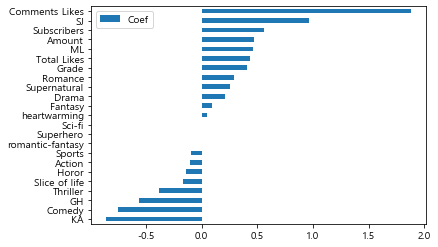

In [8]:
df_LG = pd.DataFrame(model.coef_[0], columns=['Coef'], index= X_test.columns ).sort_values(by='Coef')
df_LG.plot(kind = 'barh')
df_LG.sort_values(by='Coef', ascending = False)

## Confusion Matrix & Performances

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
def confusion_matrix_lan(X_test, y_test,lan1,lan2):
    y_true = list(y_test)
    y_pred = model.predict(X_test)
    confusion_matrix(y_true, y_pred)


    cm = confusion_matrix(y_test, y_pred) 

    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                         index = ['상위50%','하위50%'], 
                         columns = ['상위50%','하위50%'])

    plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title(lan1+ '-> '+lan2 +' \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print( 'Accuracy : {:.3f} \nPrecision : {:.3f} \nRecall : {:.3f} \nF1_score: {:.3f} '.format(accuracy_score(y_test, y_pred),
          precision_score(y_test, y_pred),
          recall_score(y_test, y_pred) ,
          f1_score(y_test, y_pred)  ))

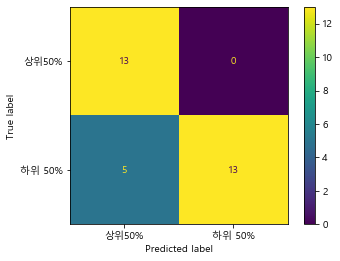

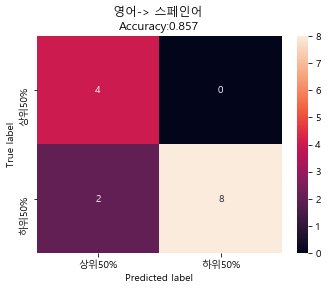

Accuracy : 0.857 
Precision : 1.000 
Recall : 0.800 
F1_score: 0.889 


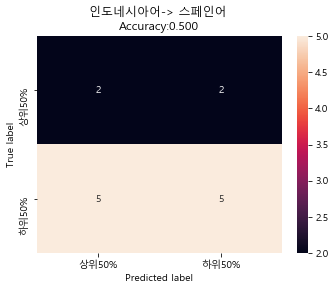

Accuracy : 0.500 
Precision : 0.714 
Recall : 0.500 
F1_score: 0.588 


In [10]:
plot_confusion_matrix(model, X_test, y_test, display_labels= ['상위50%', '하위 50%'])  
confusion_matrix_lan(X0_test, y0_test,'영어','스페인어')
confusion_matrix_lan(X1_test, y1_test,'인도네시아어','스페인어')

## KNN 

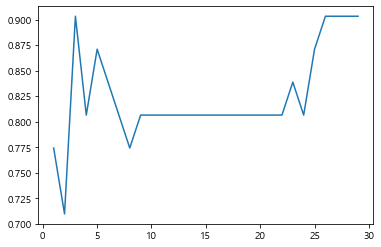

In [11]:
from sklearn.neighbors import KNeighborsClassifier

#model = KNeighborsClassifier(n_neighbors=4)
#model.fit(X_train, y_train)  
#print('[분류 결과] \n', model.predict(X_test)) 
k = 30
scores = []
for i in range(1,k):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    #print('\n [테스트 정확도] :', score)  
    scores.append(score)
# print(model.predict_proba(X_test))
K = scores.index(max(scores))+1
plt.plot([i for i in range(1,k)], scores)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

#print(model.predict_proba(X_test))
print('[분류 결과] \n', model.predict(X_test)) 
print('\n [테스트 정확도] :', model.score(X_test, y_test))  
# model.predict(xx_test)
knn = model.score(X_test, y_test)



print('\n영어-> 스페인어 테스트 정확도 :', model.score(X0_test, y0_test))  
knn_pred0 = model.score(X0_test, y0_test)

print('\n인도네시아어-> 스페인어 테스트 정확도 :', model.score(X1_test, y1_test))  
knn_pred1 = model.score(X1_test, y1_test)

[분류 결과] 
 [1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0]

 [테스트 정확도] : 0.9032258064516129

영어-> 스페인어 테스트 정확도 : 0.7857142857142857

인도네시아어-> 스페인어 테스트 정확도 : 0.5714285714285714


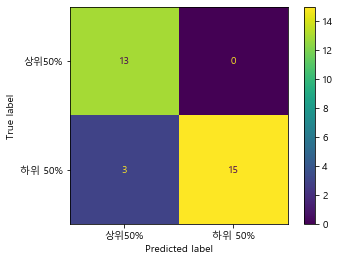

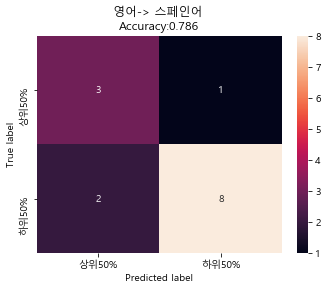

Accuracy : 0.786 
Precision : 0.889 
Recall : 0.800 
F1_score: 0.842 


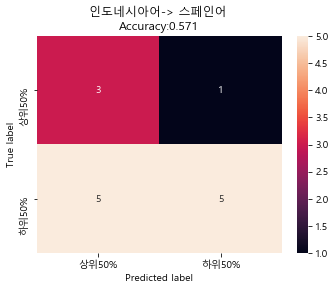

Accuracy : 0.571 
Precision : 0.833 
Recall : 0.500 
F1_score: 0.625 


In [13]:
plot_confusion_matrix(model, X_test, y_test, display_labels= ['상위50%', '하위 50%'])  
confusion_matrix_lan(X0_test, y0_test,'영어','스페인어')
confusion_matrix_lan(X1_test, y1_test,'인도네시아어','스페인어')

## RandomForest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

#print(model.predict_proba(X_test))
print('[분류 결과] \n', model.predict(X_test)) 
print('\n [테스트 정확도] :', model.score(X_test, y_test))  

RF = model.score(X_test, y_test)
# print('스페인어 분류 예측:', model.predict(xx_test))


print('\n영어-> 스페인어 테스트 정확도 :', model.score(X0_test, y0_test))  
RF_pred0 = model.score(X0_test, y0_test)

print('\n인도네시아어-> 스페인어 테스트 정확도 :', model.score(X1_test, y1_test))  
RF_pred1 = model.score(X1_test, y1_test)

[분류 결과] 
 [1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0]

 [테스트 정확도] : 0.9032258064516129

영어-> 스페인어 테스트 정확도 : 0.7142857142857143

인도네시아어-> 스페인어 테스트 정확도 : 0.42857142857142855


,Importance
Comments Likes,0.326926
Subscribers,0.152934
SJ,0.116608
Grade,0.112776
Amount,0.084333
Total Likes,0.050513
KA,0.036944
Romance,0.021721
Comedy,0.021032
GH,0.020110


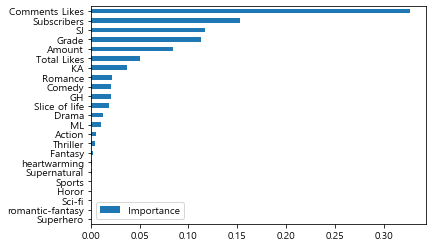

In [15]:
df_RF = pd.DataFrame(model.feature_importances_,
             columns=['Importance'], index = X_test.columns).sort_values(by='Importance')
df_RF.plot(kind='barh' ,sort_columns ='Importance' )
df_RF.sort_values(by='Importance', ascending = False)

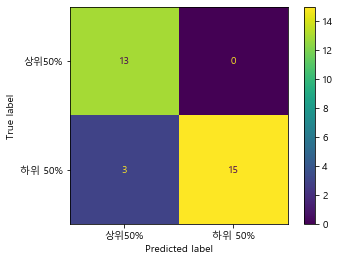

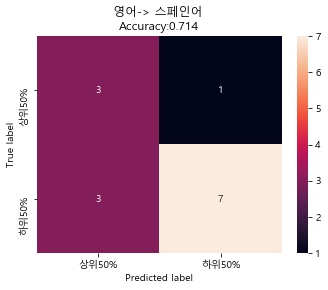

Accuracy : 0.714 
Precision : 0.875 
Recall : 0.700 
F1_score: 0.778 


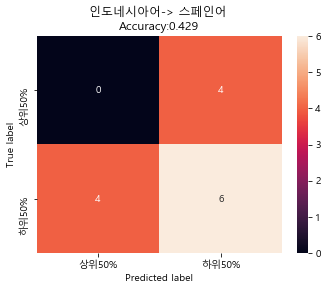

Accuracy : 0.429 
Precision : 0.600 
Recall : 0.600 
F1_score: 0.600 


In [16]:
plot_confusion_matrix(model, X_test, y_test, display_labels= ['상위50%', '하위 50%'])  
confusion_matrix_lan(X0_test, y0_test,'영어','스페인어')
confusion_matrix_lan(X1_test, y1_test,'인도네시아어','스페인어')

## SVM - SVC

In [17]:
from sklearn.svm import SVC #Ridge
model = SVC(random_state=42)
 

#분류 모델 학습 
model.fit(X_train, y_train)  

#분류 결과
print('[분류 결과] \n', model.predict(X_test)) 
print('\n 테스트 정확도 :', model.score(X_test, y_test))  
SVM= model.score(X_test, y_test)

print('\n영어-> 스페인어 테스트 정확도 :', model.score(X0_test, y0_test))  
SVM_pred0 = model.score(X0_test, y0_test)

print('\n인도네시아어-> 스페인어 테스트 정확도 :', model.score(X1_test, y1_test))  
SVM_pred1 = model.score(X1_test, y1_test)

[분류 결과] 
 [1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0]

 테스트 정확도 : 0.8387096774193549

영어-> 스페인어 테스트 정확도 : 0.8571428571428571

인도네시아어-> 스페인어 테스트 정확도 : 0.5


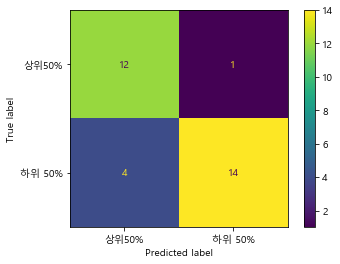

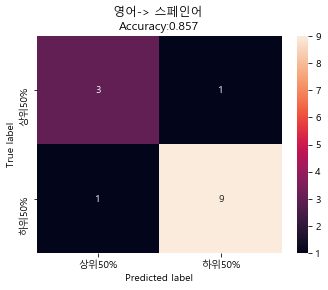

Accuracy : 0.857 
Precision : 0.900 
Recall : 0.900 
F1_score: 0.900 


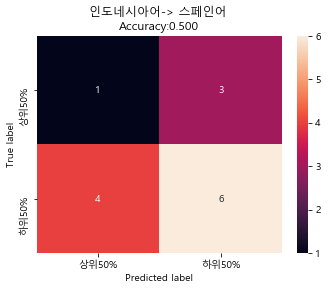

Accuracy : 0.500 
Precision : 0.667 
Recall : 0.600 
F1_score: 0.632 


In [18]:
plot_confusion_matrix(model, X_test, y_test, display_labels= ['상위50%', '하위 50%'])  
confusion_matrix_lan(X0_test, y0_test,'영어','스페인어')
confusion_matrix_lan(X1_test, y1_test,'인도네시아어','스페인어')

# Models Evaluation 
## 스페인에 자체

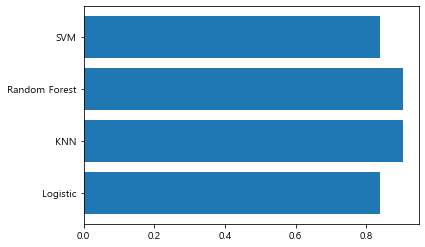

,Accuracy
Logistic,0.838710
KNN,0.903226
Random Forest,0.903226
SVM,0.838710


In [19]:
model_score=[logist,knn,RF, SVM]
models= ['Logistic','KNN','Random Forest','SVM']

plt.barh(models,model_score)
plt.show()
pd.DataFrame(model_score,index= models ,columns=['Accuracy'])

## 영어-> 스페인어

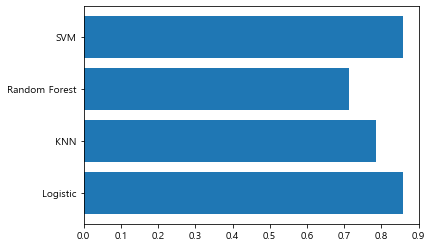

,Accuracy
Logistic,0.857143
KNN,0.785714
Random Forest,0.714286
SVM,0.857143


In [20]:
model_score=[logist_pred0,knn_pred0, RF_pred0, SVM_pred0]
models= ['Logistic','KNN','Random Forest','SVM']
plt.barh(models,model_score)
plt.show()
pd.DataFrame(model_score,index= models ,columns=['Accuracy'])

## 인도네시아어 -> 스페인어


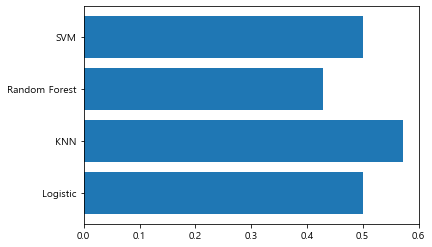

,Accuracy
Logistic,0.500000
KNN,0.571429
Random Forest,0.428571
SVM,0.500000


In [21]:
model_score=[logist_pred1,knn_pred1, RF_pred1, SVM_pred1]
models= ['Logistic','KNN','Random Forest','SVM']
plt.barh(models,model_score)
plt.show()
pd.DataFrame(model_score,index= models ,columns=['Accuracy'])